In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(seed=1234)

#download cifar10 data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 947s 6us/step


In [3]:
#check the shape of the training data set
X_train.shape

(50000, 32, 32, 3)

In [4]:
#check the shape of the testing data set
X_test.shape

(10000, 32, 32, 3)

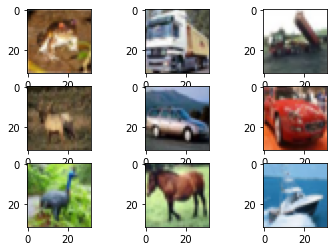

In [5]:
#plot the first 9 images in the train data set
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

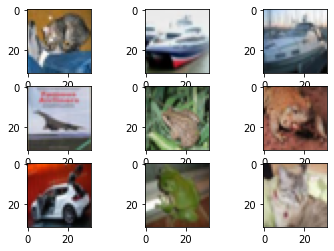

In [6]:
#plot the first 9 images in the test data set
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_test[i])
plt.show()

In [7]:
#reshape data to fit model
X_train = X_train.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)

In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize the pixel values in a range between 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
from tensorflow.keras.utils import to_categorical

#Convert the class labels into One-Hot Encoding Vector
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(X_train,y_train,test_size=0.2,random_state=13)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, LeakyReLU

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax'))

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [15]:
#train the model
model.fit(train_X, train_label, validation_data=(valid_X, valid_label),epochs=25)

Epoch 1/25
1250/1250 [==============================] - 53s 40ms/step - loss: 1.5961 - accuracy: 0.4158 - val_loss: 1.2696 - val_accuracy: 0.5411
Epoch 2/25
1250/1250 [==============================] - 49s 40ms/step - loss: 1.2379 - accuracy: 0.5598 - val_loss: 1.0519 - val_accuracy: 0.6330
Epoch 3/25
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0848 - accuracy: 0.6172 - val_loss: 0.9860 - val_accuracy: 0.6620
Epoch 4/25
1250/1250 [==============================] - 48s 38ms/step - loss: 0.9835 - accuracy: 0.6540 - val_loss: 0.9230 - val_accuracy: 0.6807
Epoch 5/25
1250/1250 [==============================] - 50s 40ms/step - loss: 0.9137 - accuracy: 0.6842 - val_loss: 0.8451 - val_accuracy: 0.7097
Epoch 6/25
1250/1250 [==============================] - 50s 40ms/step - loss: 0.8690 - accuracy: 0.6955 - val_loss: 0.8007 - val_accuracy: 0.7218
Epoch 7/25
1250/1250 [==============================] - 49s 40ms/step - loss: 0.8312 - accuracy: 0.7106 - val_loss: 0.7960 -

In [17]:
#model performance using a test set
test_eval = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_eval[0])
print("Test accuracy:", test_eval[1])

Test loss: 0.7009048461914062
Test accuracy: 0.7648000121116638


In [18]:
import numpy as np

# predictions for the test data
predictions = model.predict(X_test)
predictions = np.argmax(np.round(predictions),axis=1)
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

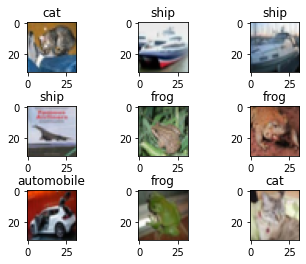

              precision    recall  f1-score   support

           0       0.38      0.84      0.53      1000
           1       0.95      0.81      0.87      1000
           2       0.80      0.56      0.66      1000
           3       0.70      0.47      0.56      1000
           4       0.72      0.77      0.74      1000
           5       0.77      0.60      0.67      1000
           6       0.82      0.83      0.83      1000
           7       0.90      0.70      0.79      1000
           8       0.87      0.85      0.86      1000
           9       0.88      0.83      0.85      1000

    accuracy                           0.73     10000
   macro avg       0.78      0.73      0.74     10000
weighted avg       0.78      0.73      0.74     10000



In [20]:
from sklearn.metrics import classification_report

# setting class names
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i])
    plt.title(classes[predictions[i]])

plt.subplots_adjust(hspace=0.7, wspace=0)
plt.show()

#Classification report
y_test_original = np.argmax(y_test,axis=1)
print(classification_report(y_true=y_test_original, y_pred=predictions))